In [1]:
import os
import pandas as pd

DATA_PATH = "data/raw"

files = os.listdir(DATA_PATH)
print("CSV files found:", files)

stock_data = {}

for file in files:
    file_lower = file.lower()

    if (
        file_lower.endswith(".csv")
        and "nifty50" not in file_lower
        and "metadata" not in file_lower
    ):
        stock_name = file.replace(".csv", "")
        path = os.path.join(DATA_PATH, file)
        stock_data[stock_name] = pd.read_csv(path)

print("Final stock count:", len(stock_data))


CSV files found: ['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFRATEL.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY50_all.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'stock_metadata.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv']
Final stock count: 50


In [2]:
stock_data["TCS"].head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [3]:
# ==========================================
# PHASE 3: DATA CLEANING
# ==========================================

for stock, df in stock_data.items():

    # 1. Convert Date column to datetime
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

    # 2. Sort data by Date (time-series rule)
    df.sort_values("Date", inplace=True)

    # 3. Drop duplicate rows (if any)
    df.drop_duplicates(inplace=True)

    # 4. Convert price columns to numeric
    price_cols = ["Open", "High", "Low", "Close", "Volume"]
    for col in price_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # 5. Handle missing values
    df.dropna(inplace=True)

    # 6. Reset index after cleaning
    df.reset_index(drop=True, inplace=True)

    # Save cleaned data back
    stock_data[stock] = df

print("✅ Data cleaning completed for all stocks")


✅ Data cleaning completed for all stocks


In [4]:
# ==========================================
# PHASE 4: FEATURE ENGINEERING
# ==========================================

for stock, df in stock_data.items():

    # Previous day's close price
    df["Prev_Close"] = df["Close"].shift(1)

    # Moving Averages
    df["MA_5"] = df["Close"].rolling(window=5).mean()
    df["MA_20"] = df["Close"].rolling(window=20).mean()

    # Volatility (10-day rolling std)
    df["Volatility"] = df["Close"].rolling(window=10).std()

    # Daily Return (%)
    df["Daily_Return"] = df["Close"].pct_change()

    # Drop rows created with NaN due to rolling features
    df.dropna(inplace=True)

    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Save back
    stock_data[stock] = df

print("✅ Feature engineering completed for all stocks")


✅ Feature engineering completed for all stocks


In [5]:
stock_data["TCS"].head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Prev_Close,MA_5,MA_20,Volatility,Daily_Return
0,2011-06-28,TCS,EQ,1150.60,1160.0,1162.0,1135.65,1153.00,1154.00,1148.87,1066666,1.225463e+14,41061.0,586841,0.5502,1150.60,1124.57,1150.2850,36.576442,0.002955
1,2011-06-29,TCS,EQ,1154.00,1154.7,1178.9,1154.70,1170.00,1169.85,1171.55,1479352,1.733140e+14,62658.0,948251,0.6410,1154.00,1141.84,1150.0075,34.159803,0.013735
2,2011-06-30,TCS,EQ,1169.85,1169.8,1192.0,1167.00,1180.00,1184.20,1179.04,2586458,3.049525e+14,62175.0,1927830,0.7454,1169.85,1159.28,1150.8300,38.516613,0.012267
3,2011-07-01,TCS,EQ,1184.20,1198.0,1198.0,1179.70,1191.00,1191.90,1187.59,960420,1.140586e+14,30833.0,583622,0.6077,1184.20,1170.11,1152.8200,43.066931,0.006502
4,2011-07-04,TCS,EQ,1191.90,1193.0,1200.0,1180.00,1182.55,1185.70,1190.26,801867,9.544289e+13,32679.0,537480,0.6703,1191.90,1177.13,1153.8875,39.032524,-0.005202


In [6]:
import matplotlib.pyplot as plt
for stock_name, df in stock_data.items():

    print("EDA for stock:", stock_name)
    # 1️⃣ Closing Price vs Date
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"])
    plt.title(f"{stock_name} - Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.close()   # ⬅️ graph created but NOT shown

    # 2️⃣ Closing Price with Moving Averages
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"], label="Close")
    plt.plot(df["Date"], df["MA_5"], label="MA 5")
    plt.plot(df["Date"], df["MA_20"], label="MA 20")
    plt.title(f"{stock_name} - Close Price & Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.close()

    # 3️⃣ Volume vs Date
    plt.figure(figsize=(12, 4))
    plt.plot(df["Date"], df["Volume"])
    plt.title(f"{stock_name} - Trading Volume")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.grid(True)
    plt.close()

    # 4️⃣ Daily Return Distribution
    plt.figure(figsize=(8, 4))
    plt.hist(df["Daily_Return"].dropna(), bins=50)
    plt.title(f"{stock_name} - Daily Return Distribution")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.close()



EDA for stock: ADANIPORTS
EDA for stock: ASIANPAINT
EDA for stock: AXISBANK
EDA for stock: BAJAJ-AUTO
EDA for stock: BAJAJFINSV
EDA for stock: BAJFINANCE
EDA for stock: BHARTIARTL
EDA for stock: BPCL
EDA for stock: BRITANNIA
EDA for stock: CIPLA
EDA for stock: COALINDIA
EDA for stock: DRREDDY
EDA for stock: EICHERMOT
EDA for stock: GAIL
EDA for stock: GRASIM
EDA for stock: HCLTECH
EDA for stock: HDFC
EDA for stock: HDFCBANK
EDA for stock: HEROMOTOCO
EDA for stock: HINDALCO
EDA for stock: HINDUNILVR
EDA for stock: ICICIBANK
EDA for stock: INDUSINDBK
EDA for stock: INFRATEL
EDA for stock: INFY
EDA for stock: IOC
EDA for stock: ITC
EDA for stock: JSWSTEEL
EDA for stock: KOTAKBANK
EDA for stock: LT
EDA for stock: MARUTI
EDA for stock: MM
EDA for stock: NESTLEIND
EDA for stock: NTPC
EDA for stock: ONGC
EDA for stock: POWERGRID
EDA for stock: RELIANCE
EDA for stock: SBIN
EDA for stock: SHREECEM
EDA for stock: SUNPHARMA
EDA for stock: TATAMOTORS
EDA for stock: TATASTEEL
EDA for stock: TCS
EDA

In [7]:
# ==========================================
# PHASE 5: TRAIN-TEST SPLIT (TIME SERIES)
# ==========================================

from sklearn.model_selection import train_test_split

model_data = {}

FEATURE_COLS = [
    "Prev_Close",
    "MA_5",
    "MA_20",
    "Volatility",
    "Daily_Return",
    "Volume"
]

TARGET_COL = "Close"

for stock, df in stock_data.items():

    # Features & target
    X = df[FEATURE_COLS]
    y = df[TARGET_COL]

    # Time-series split (NO shuffle)
    split_index = int(len(df) * 0.8)

    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]

    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    model_data[stock] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

print("✅ Train-test split completed for all stocks")
print("Sample stock split check:")
sample_stock = list(model_data.keys())[0]
print(sample_stock, model_data[sample_stock]["X_train"].shape)


✅ Train-test split completed for all stocks
Sample stock split check:
ADANIPORTS (1949, 6)


In [8]:
model_data["MARUTI"]["X_train"].head()


,Prev_Close,MA_5,MA_20,Volatility,Daily_Return,Volume
0,1152.75,1130.45,1191.0175,33.447442,0.004424,267340
1,1157.85,1141.29,1187.3600,28.396369,0.016496,235700
2,1176.95,1153.41,1184.0850,24.348170,-0.014487,416028
3,1159.90,1158.12,1179.5475,23.412606,-0.014441,447038
4,1143.15,1159.13,1175.8375,23.192576,0.012815,278505


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Try importing XGBoost safely
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

# Storage
trained_models = {}
model_scores = {}

MIN_TRAIN_SAMPLES = 30  # safety threshold

for stock, data in model_data.items():

    X_train = data["X_train"]
    X_test = data["X_test"]
    y_train = data["y_train"]
    y_test = data["y_test"]

    # 🔴 Skip stocks with insufficient data
    if len(X_train) < MIN_TRAIN_SAMPLES or len(X_test) == 0:
        print(f"⚠️ Skipping {stock} (insufficient data)")
        continue

    # -------------------------------
    # Scaling (for linear, ridge, knn)
    # -------------------------------
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    trained_models[stock] = {}
    model_scores[stock] = {}

    # -------------------------------
    # 1️⃣ Linear Regression
    # -------------------------------
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    preds = lr.predict(X_test_scaled)

    model_scores[stock]["LinearRegression"] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

    # -------------------------------
    # 2️⃣ Ridge Regression
    # -------------------------------
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_scaled, y_train)
    preds = ridge.predict(X_test_scaled)

    model_scores[stock]["Ridge"] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

    # -------------------------------
    # 3️⃣ KNN
    # -------------------------------
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)

    model_scores[stock]["KNN"] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

    # -------------------------------
    # 4️⃣ Random Forest
    # -------------------------------
    rf = RandomForestRegressor(
        n_estimators=100,
        random_state=42
    )
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

    model_scores[stock]["RandomForest"] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

    # -------------------------------
    # 5️⃣ Gradient Boosting
    # -------------------------------
    gbr = GradientBoostingRegressor(random_state=42)
    gbr.fit(X_train, y_train)
    preds = gbr.predict(X_test)

    model_scores[stock]["GradientBoosting"] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

    # -------------------------------
    # 6️⃣ XGBoost (if available)
    # -------------------------------
    if xgb_available:
        xgb = XGBRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        xgb.fit(X_train, y_train)
        preds = xgb.predict(X_test)

        model_scores[stock]["XGBoost"] = {
            "MAE": mean_absolute_error(y_test, preds),
            "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
            "R2": r2_score(y_test, preds)
        }

print("✅ Model training completed for all valid stocks")
print("Total stocks trained:", len(model_scores))



⚠️ Skipping INFRATEL (insufficient data)
✅ Model training completed for all valid stocks
Total stocks trained: 49


In [10]:
# ==========================================
# PHASE 8: MODEL COMPARISON TABLE
# ==========================================

comparison_rows = []

for stock, models in model_scores.items():
    for model_name, metrics in models.items():
        comparison_rows.append({
            "Stock": stock,
            "Model": model_name,
            "MAE": round(metrics["MAE"], 4),
            "RMSE": round(metrics["RMSE"], 4),
            "R2": round(metrics["R2"], 4)
        })

comparison_df = pd.DataFrame(comparison_rows)

# Sort by best performance (highest R2)
comparison_df.sort_values(
    by=["Stock", "R2"],
    ascending=[True, False],
    inplace=True
)

print("✅ Model comparison table created")
comparison_df


✅ Model comparison table created


,Stock,Model,MAE,RMSE,R2
0,ADANIPORTS,LinearRegression,3.0821,6.1306,0.9975
1,ADANIPORTS,Ridge,3.2454,6.1755,0.9974
4,ADANIPORTS,GradientBoosting,37.7590,94.7556,0.3979
3,ADANIPORTS,RandomForest,38.2729,96.0559,0.3812
5,ADANIPORTS,XGBoost,39.7796,98.4901,0.3495
...,...,...,...,...,...
289,ZEEL,Ridge,4.0889,6.3563,0.9914
292,ZEEL,GradientBoosting,4.5759,6.8859,0.9899
293,ZEEL,XGBoost,5.3148,7.5887,0.9877
291,ZEEL,RandomForest,5.1927,7.9807,0.9864


In [11]:
# ==========================================
# PHASE 9: BEST MODEL SELECTION
# ==========================================

# Pick best model per stock based on LOWEST RMSE
best_model_df = (
    comparison_df
    .sort_values(["Stock", "RMSE"], ascending=[True, True])
    .groupby("Stock")
    .first()
    .reset_index()
)

# Rename for dashboard clarity
best_model_df.rename(columns={
    "Model": "Best_Model",
    "MAE": "Best_MAE",
    "RMSE": "Best_RMSE",
    "R2": "Best_R2"
}, inplace=True)

print("✅ Best model selected for each stock")

best_model_df


✅ Best model selected for each stock


,Stock,Best_Model,Best_MAE,Best_RMSE,Best_R2
0,ADANIPORTS,LinearRegression,3.0821,6.1306,0.9975
1,ASIANPAINT,Ridge,24.7323,35.7684,0.9912
2,AXISBANK,GradientBoosting,7.6185,12.3651,0.9922
3,BAJAJ-AUTO,LinearRegression,10.3281,16.8157,0.9985
4,BAJAJFINSV,LinearRegression,89.9627,136.2796,0.9935
5,BAJFINANCE,GradientBoosting,47.3629,69.4392,0.9944
6,BHARTIARTL,Ridge,2.0633,3.2231,0.9985
7,BPCL,GradientBoosting,2.3981,3.5252,0.9961
8,BRITANNIA,GradientBoosting,18.8485,26.6548,0.9955
9,CIPLA,LinearRegression,2.2226,3.7763,0.9994


In [12]:
# ==========================================
# PHASE 10: NEXT-DAY PREDICTION (FINAL TABLE)
# ==========================================

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

next_day_rows = []

FEATURE_COLS = [
    "Prev_Close",
    "MA_5",
    "MA_20",
    "Volatility",
    "Daily_Return",
    "Volume"
]

for _, row in best_model_df.iterrows():

    stock = row["Stock"]
    best_model_name = row["Best_Model"]
    df = stock_data[stock]

    # -------------------------------
    # Recreate best model
    # -------------------------------
    if best_model_name == "LinearRegression":
        model = LinearRegression()
    elif best_model_name == "Ridge":
        model = Ridge(alpha=1.0)
    elif best_model_name == "KNN":
        model = KNeighborsRegressor(n_neighbors=5)
    elif best_model_name == "RandomForest":
        model = RandomForestRegressor(n_estimators=200, random_state=42)
    elif best_model_name == "GradientBoosting":
        model = GradientBoostingRegressor(random_state=42)
    elif best_model_name == "XGBoost":
        model = XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=6,
            random_state=42
        )
    else:
        continue

    # -------------------------------
    # Train on full historical data
    # -------------------------------
    X = df[FEATURE_COLS]
    y = df["Close"]
    model.fit(X, y)

    # -------------------------------
    # Build next-day feature row
    # -------------------------------
    last_row = df.iloc[-1]

    X_next = pd.DataFrame([{
        "Prev_Close": last_row["Close"],
        "MA_5": df["Close"].tail(5).mean(),
        "MA_20": df["Close"].tail(20).mean(),
        "Volatility": df["Close"].tail(10).std(),
        "Daily_Return": df["Close"].pct_change().iloc[-1],
        "Volume": last_row["Volume"]
    }])

    next_price = model.predict(X_next)[0]

    next_day_rows.append({
        "Stock": stock,
        "Best_Model": best_model_name,
        "Last_Close": round(last_row["Close"], 2),
        "Predicted_Next_Close": round(next_price, 2)
    })

# -------------------------------
# Final Prediction Table
# -------------------------------
next_day_prediction_df = pd.DataFrame(next_day_rows)

print("✅ Phase 10 completed successfully")
next_day_prediction_df




C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.84616e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.09787e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.50612e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.74363e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: Li

✅ Phase 10 completed successfully


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.65551e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,Stock,Best_Model,Last_Close,Predicted_Next_Close
0,ADANIPORTS,LinearRegression,730.05,725.940000
1,ASIANPAINT,Ridge,2536.40,2499.340000
2,AXISBANK,GradientBoosting,714.90,707.510000
3,BAJAJ-AUTO,LinearRegression,3833.75,3834.450000
4,BAJAJFINSV,LinearRegression,11041.65,10935.250000
5,BAJFINANCE,GradientBoosting,5451.90,5366.300000
6,BHARTIARTL,Ridge,536.75,534.660000
7,BPCL,GradientBoosting,421.80,423.550000
8,BRITANNIA,GradientBoosting,3449.00,3447.750000
9,CIPLA,LinearRegression,910.35,912.880000


In [13]:
# ==========================================
# PHASE 11: MULTI-DAY FORECASTING (RECURSIVE)
# ==========================================

FORECAST_DAYS_30 = 30
FORECAST_DAYS_1Y = 252   # approx 1 trading year

forecast_30d = {}
forecast_1y = {}

FEATURE_COLS = [
    "Prev_Close",
    "MA_5",
    "MA_20",
    "Volatility",
    "Daily_Return",
    "Volume"
]

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

def get_model(model_name):
    if model_name == "LinearRegression":
        return LinearRegression()
    if model_name == "Ridge":
        return Ridge(alpha=1.0)
    if model_name == "KNN":
        return KNeighborsRegressor(n_neighbors=5)
    if model_name == "RandomForest":
        return RandomForestRegressor(n_estimators=200, random_state=42)
    if model_name == "GradientBoosting":
        return GradientBoostingRegressor(random_state=42)
    if model_name == "XGBoost":
        return XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=6,
            random_state=42
        )

# -------------------------------
# Forecast loop for ALL stocks
# -------------------------------
for _, row in best_model_df.iterrows():

    stock = row["Stock"]
    best_model_name = row["Best_Model"]

    df = stock_data[stock].copy()

    # Train best model on full data
    model = get_model(best_model_name)
    X = df[FEATURE_COLS]
    y = df["Close"]
    model.fit(X, y)

    # Store predictions
    future_30 = []
    future_1y = []

    temp_df = df.copy()

    for day in range(FORECAST_DAYS_1Y):

        last_row = temp_df.iloc[-1]

        X_next = pd.DataFrame([{
            "Prev_Close": last_row["Close"],
            "MA_5": temp_df["Close"].tail(5).mean(),
            "MA_20": temp_df["Close"].tail(20).mean(),
            "Volatility": temp_df["Close"].tail(10).std(),
            "Daily_Return": temp_df["Close"].pct_change().iloc[-1],
            "Volume": last_row["Volume"]   # assume volume unchanged
        }])

        next_price = model.predict(X_next)[0]

        # Append prediction
        new_row = last_row.copy()
        new_row["Close"] = next_price
        temp_df = pd.concat([temp_df, pd.DataFrame([new_row])], ignore_index=True)

        if day < FORECAST_DAYS_30:
            future_30.append(round(next_price, 2))

        future_1y.append(round(next_price, 2))

    forecast_30d[stock] = future_30
    forecast_1y[stock] = future_1y

print("✅ PHASE 11 completed: 30-day & 1-year forecasts generated")


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.84616e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.09787e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.50612e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.74363e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: Li

✅ PHASE 11 completed: 30-day & 1-year forecasts generated


In [14]:
# ==========================================
# PHASE 12: VISUALIZATION FOR PREDICTIONS
# ==========================================

import matplotlib.pyplot as plt

plots = {}

for _, row in best_model_df.iterrows():

    stock = row["Stock"]
    df = stock_data[stock]

    plots[stock] = {}

    # -------------------------------
    # 1️⃣ Actual Closing Price (Historical)
    # -------------------------------
    fig1 = plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"])
    plt.title(f"{stock} - Actual Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plots[stock]["actual"] = fig1
    plt.close()

    # -------------------------------
    # 2️⃣ Next 30-Day Forecast
    # -------------------------------
    fig2 = plt.figure(figsize=(12, 5))
    plt.plot(range(1, 31), forecast_30d[stock])
    plt.title(f"{stock} - Next 30 Day Forecast")
    plt.xlabel("Days Ahead")
    plt.ylabel("Predicted Price")
    plt.grid(True)
    plots[stock]["forecast_30d"] = fig2
    plt.close()

    # -------------------------------
    # 3️⃣ Next 1-Year Forecast
    # -------------------------------
    fig3 = plt.figure(figsize=(12, 5))
    plt.plot(range(1, 253), forecast_1y[stock])
    plt.title(f"{stock} - Next 1 Year Forecast")
    plt.xlabel("Trading Days Ahead")
    plt.ylabel("Predicted Price")
    plt.grid(True)
    plots[stock]["forecast_1y"] = fig3
    plt.close()

    # -------------------------------
    # 4️⃣ Historical + 30-Day Forecast
    # -------------------------------
    fig4 = plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"], label="Historical")
    plt.plot(
        range(len(df), len(df) + 30),
        forecast_30d[stock],
        linestyle="dashed",
        label="30-Day Forecast"
    )
    plt.title(f"{stock} - Historical + Future")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plots[stock]["combined"] = fig4
    plt.close()

print("✅ PHASE 12 completed: All prediction plots generated")


✅ PHASE 12 completed: All prediction plots generated


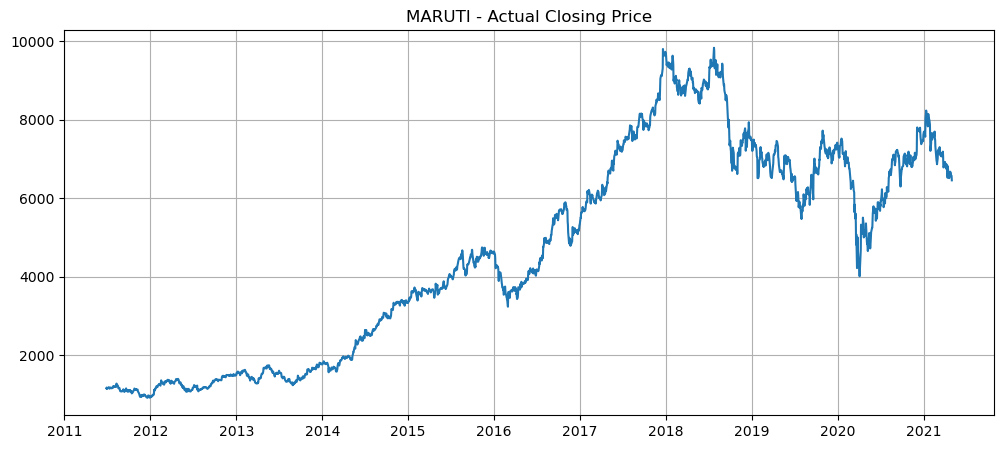

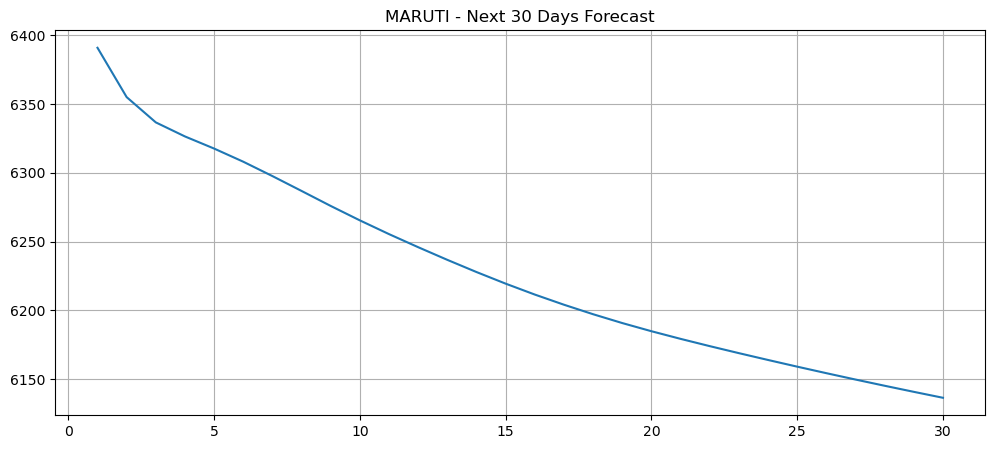

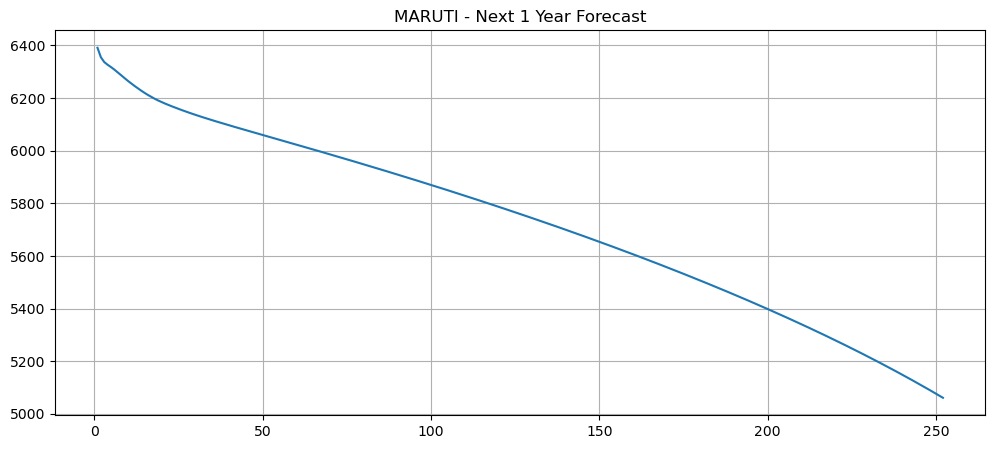

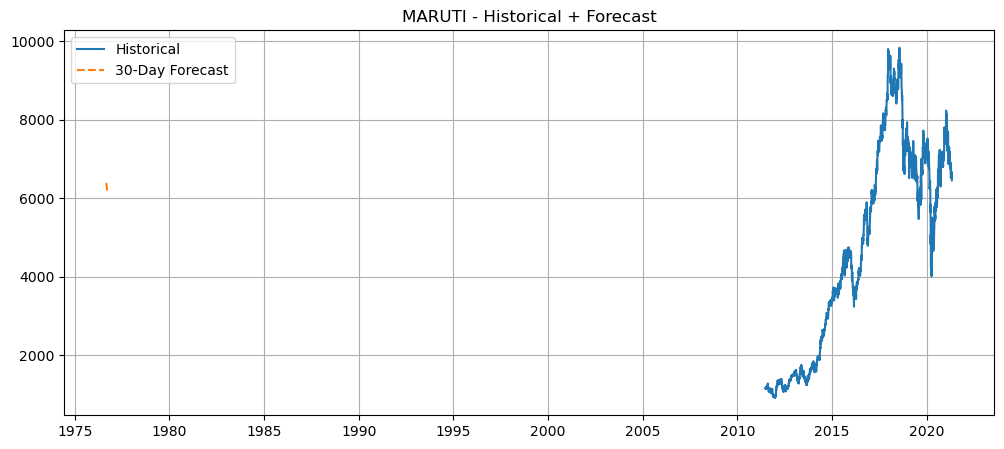

In [15]:
import matplotlib.pyplot as plt

stock = "MARUTI"   # change to any stock
df = stock_data[stock]

# 1️⃣ Actual price
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"])
plt.title(f"{stock} - Actual Closing Price")
plt.grid(True)
plt.show()

# 2️⃣ 30-day forecast
plt.figure(figsize=(12,5))
plt.plot(range(1,31), forecast_30d[stock])
plt.title(f"{stock} - Next 30 Days Forecast")
plt.grid(True)
plt.show()

# 3️⃣ 1-year forecast
plt.figure(figsize=(12,5))
plt.plot(range(1,253), forecast_1y[stock])
plt.title(f"{stock} - Next 1 Year Forecast")
plt.grid(True)
plt.show()

# 4️⃣ Combined
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"], label="Historical")
plt.plot(
    range(len(df), len(df)+30),
    forecast_30d[stock],
    linestyle="dashed",
    label="30-Day Forecast"
)
plt.legend()
plt.title(f"{stock} - Historical + Forecast")
plt.grid(True)
plt.show()



In [16]:
# ==========================================
# PHASE 13: PERFORMANCE COMPARISON TABLE
# ==========================================

# Merge best-model info into comparison table
performance_df = comparison_df.merge(
    best_model_df[["Stock", "Best_Model"]],
    left_on="Stock",
    right_on="Stock",
    how="left"
)

# Mark best model
performance_df["Best_Model_Tag"] = performance_df.apply(
    lambda row: "✅ Best" if row["Model"] == row["Best_Model"] else "",
    axis=1
)

# Reorder columns for clarity
performance_df = performance_df[
    ["Stock", "Model", "MAE", "RMSE", "R2", "Best_Model_Tag"]
]

# Sort nicely (Stock → RMSE)
performance_df = performance_df.sort_values(
    by=["Stock", "RMSE"],
    ascending=[True, True]
).reset_index(drop=True)

print("✅ Phase 13 completed: Performance comparison table ready")

performance_df


✅ Phase 13 completed: Performance comparison table ready


,Stock,Model,MAE,RMSE,R2,Best_Model_Tag
0,ADANIPORTS,LinearRegression,3.0821,6.1306,0.9975,✅ Best
1,ADANIPORTS,Ridge,3.2454,6.1755,0.9974,
2,ADANIPORTS,GradientBoosting,37.7590,94.7556,0.3979,
3,ADANIPORTS,RandomForest,38.2729,96.0559,0.3812,
4,ADANIPORTS,XGBoost,39.7796,98.4901,0.3495,
...,...,...,...,...,...,...
289,ZEEL,Ridge,4.0889,6.3563,0.9914,
290,ZEEL,GradientBoosting,4.5759,6.8859,0.9899,
291,ZEEL,XGBoost,5.3148,7.5887,0.9877,
292,ZEEL,RandomForest,5.1927,7.9807,0.9864,


In [17]:
import os

OUTPUT_DIR = "streamlit_data"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------------
# 1️⃣ Save stock data (per stock)
# -----------------------------------
for stock, df in stock_data.items():
    df.to_csv(f"{OUTPUT_DIR}/{stock}_data.csv", index=False)

# -----------------------------------
# 2️⃣ Save best model table
# -----------------------------------
best_model_df.to_csv(f"{OUTPUT_DIR}/best_models.csv", index=False)

# -----------------------------------
# 3️⃣ Save next-day predictions
# -----------------------------------
next_day_prediction_df.to_csv(
    f"{OUTPUT_DIR}/next_day_predictions.csv",
    index=False
)

# -----------------------------------
# 4️⃣ Save performance comparison
# -----------------------------------
performance_df.to_csv(
    f"{OUTPUT_DIR}/performance_comparison.csv",
    index=False
)

# -----------------------------------
# 5️⃣ Save 30-day forecast
# -----------------------------------
forecast_30_df = pd.DataFrame(forecast_30d).T
forecast_30_df.to_csv(
    f"{OUTPUT_DIR}/forecast_30d.csv"
)

# -----------------------------------
# 6️⃣ Save 1-year forecast
# -----------------------------------
forecast_1y_df = pd.DataFrame(forecast_1y).T
forecast_1y_df.to_csv(
    f"{OUTPUT_DIR}/forecast_1y.csv"
)

print("✅ All CSV files saved for Streamlit")


✅ All CSV files saved for Streamlit
